# **Exploratory Data Analysis on Titanic Dataset**

# **01. Load the data and inspect**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("\nDataFrame Information:")
df.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("\nDataFrame Shape (rows, columns):")
print(df.shape)


DataFrame Shape (rows, columns):
(891, 12)


In [5]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object'))


Descriptive Statistics for Categorical Columns:
                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Cleaning the data**

# **01. Handle Missing Values - Column by Column:**

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
print("\nMissing values after filling Age:")
print(df.isnull().sum())


Missing values after filling Age:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-9-162956245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)
print("\nMissing values after filling Embarked:")
print(df.isnull().sum())


Missing values after filling Embarked:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-10-126539423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [11]:
df['Has_Cabin'] = df['Cabin'].notna() # True if Cabin exists, False otherwise
df.drop('Cabin', axis=1, inplace=True) # Drop the original Cabin column
print("\nMissing values after handling Cabin:")
print(df.isnull().sum())
print("Columns after dropping Cabin:")
print(df.columns)


Missing values after handling Cabin:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64
Columns after dropping Cabin:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin'],
      dtype='object')


## **02. Feature Engineering (Creating New Insightful Columns):**

In [12]:
#Combine SibSp (siblings/spouses) and Parch (parents/children) to get FamilySize.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\nSurvival Rates by Family Size (after feature engineering):")
print(df.groupby('FamilySize')['Survived'].mean() * 100)


Survival Rates by Family Size (after feature engineering):
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


In [13]:
#Checking if passenger is traveling alone
df['IsAlone'] = (df['FamilySize'] == 1)
print("\nSurvival Rates for Alone vs. With Family (after feature engineering):")
print(df.groupby('IsAlone')['Survived'].mean() * 100)


Survival Rates for Alone vs. With Family (after feature engineering):
IsAlone
False    50.564972
True     30.353818
Name: Survived, dtype: float64


# **Exploratory Data Analysis (Finding Patterns!)**

# **01. Overall Survival Rate:**

In [14]:
print("\nOverall Survival Rates:")
print(df['Survived'].value_counts(normalize=True) * 100)


Overall Survival Rates:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


# **2. Survival by Key Categories:**

In [15]:
print("\nSurvival Rates by Gender:")
print(df.groupby('Sex')['Survived'].mean() * 100)


Survival Rates by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [16]:
print("\nSurvival Rates by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean() * 100)


Survival Rates by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [17]:
print("\nSurvival Rates by Embarked Port:")
print(df.groupby('Embarked')['Survived'].mean() * 100)


Survival Rates by Embarked Port:
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


In [18]:
print("\nSurvival Rates by 'Has_Cabin' status:")
print(df.groupby('Has_Cabin')['Survived'].mean() * 100)


Survival Rates by 'Has_Cabin' status:
Has_Cabin
False    29.985444
True     66.666667
Name: Survived, dtype: float64


## **Data Visualization (Telling the Story with Charts!)**

# **01. Overall Survival Count Plot:**

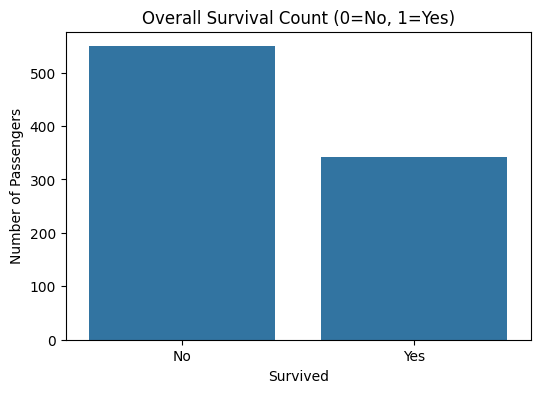

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# **02. Survival Rate Bar Plots:**

# **i. By Gender**

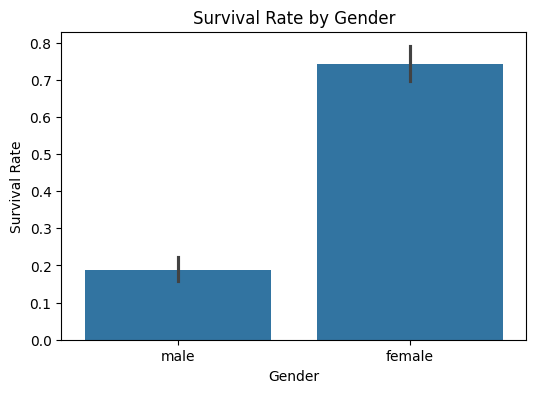

In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# **ii. By Passenger Class:**

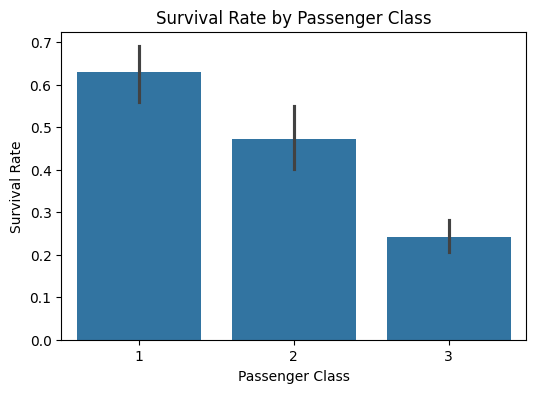

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# **iii. By Embarked Port:**

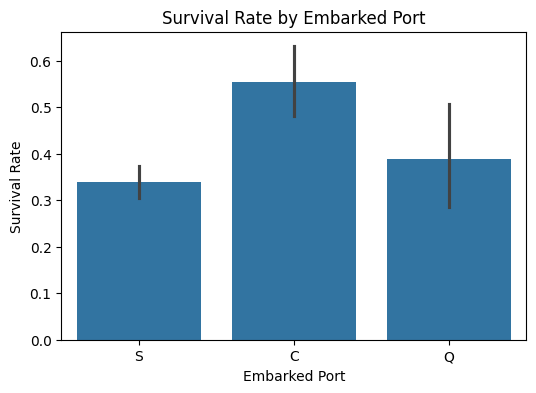

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

# **iv. By Family Size:**

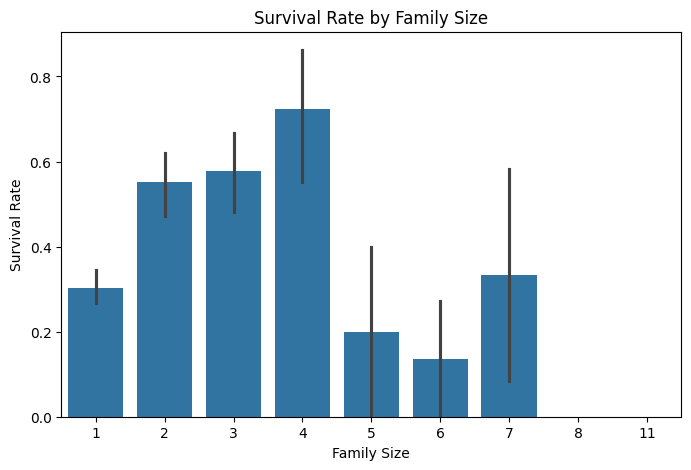

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# **v. By Alone vs. With Family:**

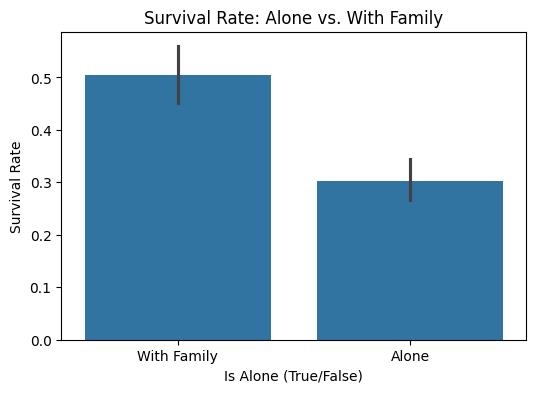

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate: Alone vs. With Family')
plt.xlabel('Is Alone (True/False)')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['With Family', 'Alone'])
plt.show()

# **Numerical Distribution Plots (with Survival Hue):**

# **i. Age Distribution by Survival:**

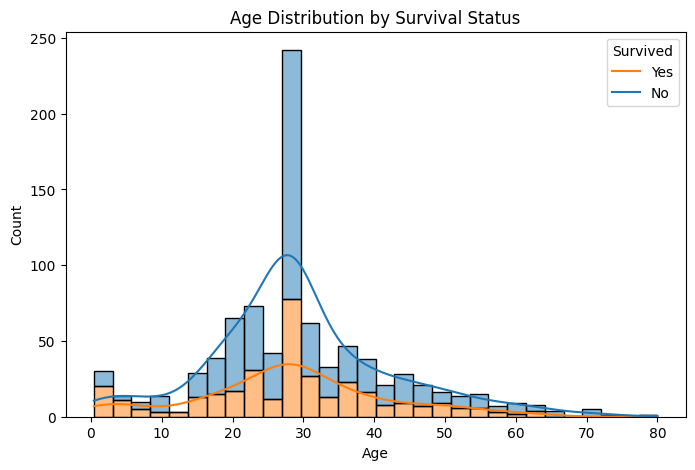

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

# **ii. Fare Distribution by Survival:**

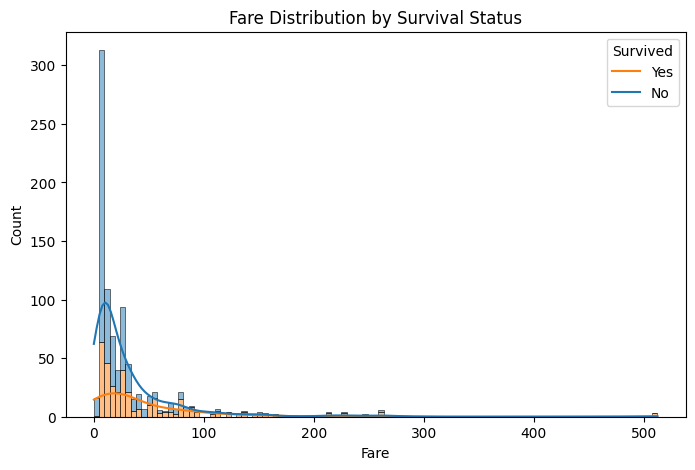

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

# **Correlation HeatMap**

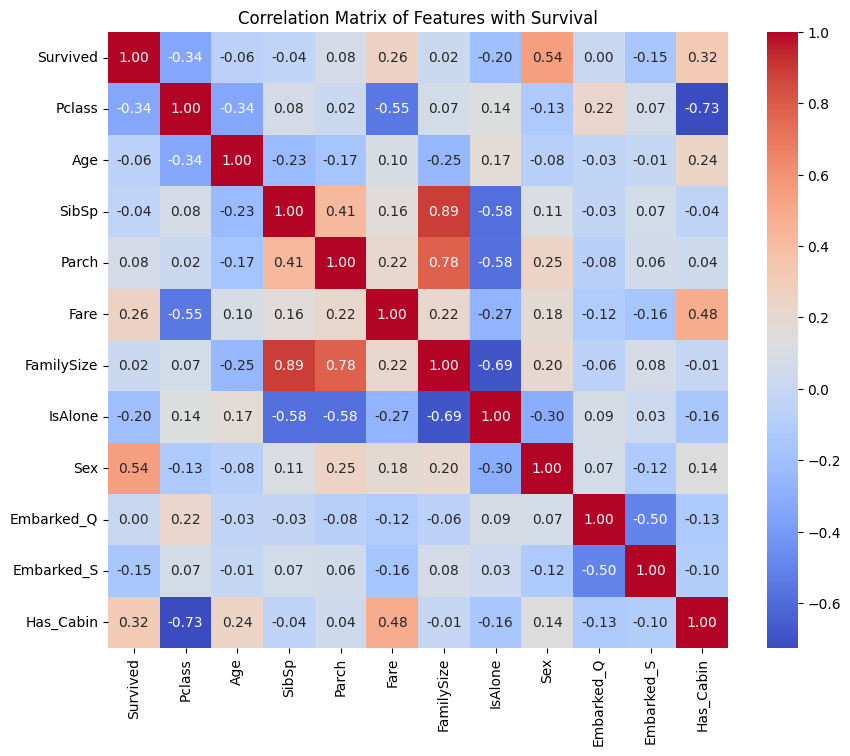

In [27]:
# Prepare data for correlation by encoding categorical variables
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=True)
df_encoded['IsAlone'] = df_encoded['IsAlone'].astype(int)
df_encoded['Has_Cabin'] = df_encoded['Has_Cabin'].astype(int)

# Select numerical columns for correlation (excluding non-relevant IDs/names)
numerical_df = df_encoded[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex', 'Embarked_Q', 'Embarked_S', 'Has_Cabin']]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features with Survival')
plt.show()